Преподаватель: Артур Сапрыкин
Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)
Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей

Построить случайный лес, вывести важность признаков

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии

Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)

В качестве решения: Jupyter notebook с кодом, комментариями и графиками, ссылка на гитхаб

In [93]:
import pandas as pd
import numpy as np

In [94]:
# Download data
data = pd.read_csv('train.csv')
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [96]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [68]:
# data.dropna(inplace=True)



In [103]:
# Choose categorical colunms and use LabelEncoder for them
data_categ = data.select_dtypes(include=["object_"])
cols = data_categ.columns
print(cols)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [114]:
# categorical field 
data[cols] = data[cols].fillna('nan')
# data.loc[:, data.columns !='SalePrice'] = data.loc[:, data.columns !='SalePrice'].fillna()
# numeric field fillna median
data = data.fillna(data.median())

# data_le.loc[:, data.columns !='SalePrice']
data[cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
1,RL,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
2,RL,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal
3,RL,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,nan,nan,nan,WD,Abnorml
4,RL,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,nan,nan,nan,WD,Normal


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [116]:
# class to help transform data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [117]:
# print(cols)
data_le = MultiColumnLabelEncoder(columns = cols).fit_transform(data)
data_le.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [118]:
# split data
import numpy as np
from sklearn.model_selection import train_test_split

X = data_le.loc[:, data.columns !='SalePrice']
y = data_le[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 42 - The Ultimate Question of Life, the Universe, and Everything
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,136,20,3,80.0,10400,1,2,3,3,0,...,0,0,3,2,4,0,5,2008,8,4
1452,1453,180,4,35.0,3675,1,2,3,3,0,...,0,0,3,4,4,0,5,2006,8,4
762,763,60,1,72.0,8640,1,2,3,3,0,...,0,0,3,4,4,0,6,2010,2,4
932,933,20,3,84.0,11670,1,2,0,3,0,...,0,0,3,4,4,0,3,2007,8,4
435,436,60,3,43.0,10667,1,2,1,3,0,...,0,0,3,4,4,0,4,2009,5,4


In [120]:
# Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей
>>> from sklearn.model_selection import cross_val_score
# >>> clf = svm.SVC(kernel='linear', C=1)
# >>> scores = cross_val_score(clf, X, y, cv=5)

# Построить случайный лес, вывести важность признаков
from sklearn.ensemble import RandomForestRegressor
rnf_clr = RandomForestRegressor()
rnf_clr.fit(X_train, y_train)
y_pred =rnf_clr.predict(X_test)
# 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [122]:
scores = cross_val_score(rnf_clr, X, y, cv=10) # Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей
print(rnf_clr.__class__.__name__,scores.mean())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was pa

RandomForestRegressor 0.8643576556242035


Feature ranking:
1. feature 17 (0.535174)
2. feature 46 (0.123984)
3. feature 44 (0.037093)
4. feature 38 (0.030325)
5. feature 34 (0.027680)
6. feature 43 (0.023048)
7. feature 61 (0.019726)
8. feature 30 (0.016465)
9. feature 62 (0.015639)
10. feature 4 (0.013076)
11. feature 19 (0.010913)
12. feature 60 (0.009453)
13. feature 54 (0.008025)
14. feature 20 (0.007134)
15. feature 66 (0.007050)
16. feature 3 (0.006793)
17. feature 67 (0.006574)
18. feature 12 (0.006360)
19. feature 70 (0.006234)
20. feature 37 (0.005432)
21. feature 59 (0.005277)
22. feature 58 (0.004997)
23. feature 26 (0.004726)
24. feature 0 (0.003870)
25. feature 49 (0.003672)
26. feature 76 (0.003542)
27. feature 18 (0.003384)
28. feature 53 (0.003378)
29. feature 1 (0.003213)
30. feature 27 (0.003092)
31. feature 57 (0.003006)
32. feature 71 (0.002739)
33. feature 41 (0.002676)
34. feature 79 (0.002364)
35. feature 32 (0.002152)
36. feature 56 (0.002073)
37. feature 8 (0.001939)
38. feature 51 (0.001929)
39. featu

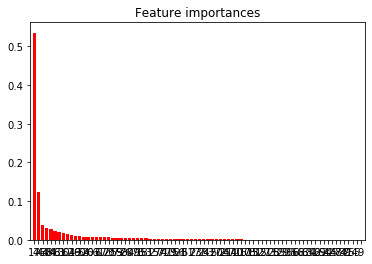

In [123]:
# вывести важность признаков
# print(rnf_clf.feature_importances_)
import matplotlib.pyplot as plt

# data.shape[1]
# data_le.feature_names
importances = rnf_clr.feature_importances_
indices = np.argsort(importances)[::-1]

std = np.std([rnf_clr.feature_importances_ for tree in rnf_clr.estimators_],
             axis=0)

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show() 
# Feature 17

([<matplotlib.axis.YTick at 0x1ef05f207b8>,
 <a list of 80 Text yticklabel objects>)

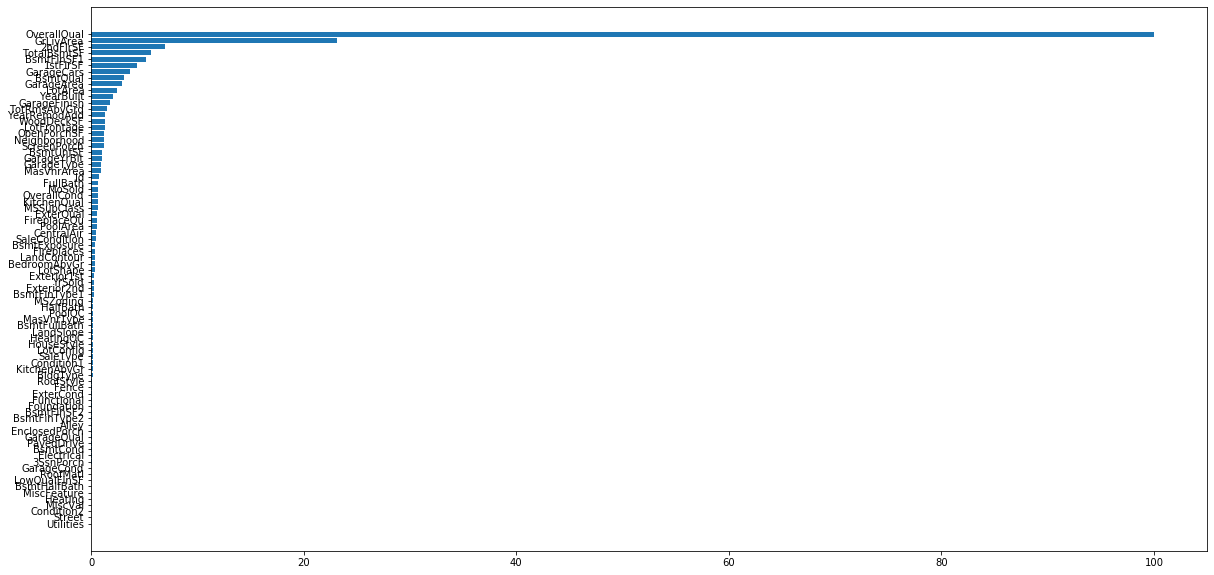

In [127]:
feature_importance = rnf_clr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])

In [157]:
# Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
# Choose algoritms which I'll use
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

estimators = [('ridge', Ridge()), #linear with regularization
              ('knn_r', KNeighborsRegressor(n_neighbors = 5)),
              ('tree', DecisionTreeRegressor())] #not linear

# create main model which includ 3 estimators
main_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42))
main_model.fit(X_train, y_train)
y_pred_main = main_model.predict(X_test)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
# Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии
scores = cross_val_score(main_model, X_train, y_train, cv=10)
print(f'Accuracy: {scores.mean()}, (+/- {scores.std() * 2}) ')


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy: 0.8331703930063261, (+/- 0.13401361373838755) 


In [156]:
# Показать, что использование ансамблей моделей действительно улучшает качество 
# (стекинг vs другие модели сравнивать на hold-out)

# Conclusion: Staking model working better than individual models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor

ridge = Ridge()
knn_r = KNeighborsRegressor(n_neighbors = 5)
tree = DecisionTreeRegressor()

for regr in (ridge, knn_r, tree):
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    scores = cross_val_score(regr, X_train, y_train, cv=10)
    print(regr.__class__.__name__,scores.mean())        
  

Ridge 0.6669492478791255
KNeighborsRegressor 0.6174167856963344
DecisionTreeRegressor 0.6965291991417375
